# Benchmark base64 algos


See [base64.cpp](base64.cpp) & [base64.h](base64.h). base64.so was simply compiled using 
```bash
clang++ -fPIC -Wall -shared -O3 base64.cpp -o base64.so
````

In [11]:
#include "xtl/xbase64.hpp"

#include "base64.h"
#pragma cling load("base64.so")

In [2]:
#include <vector>
#include <fstream>
#include <iostream>

std::vector<unsigned char> read_binary_file(const char *file)
{
    std::ifstream ifd(file, std::ios::binary | std::ios::ate);
    auto size = ifd.tellg();
    ifd.seekg(0, std::ios::beg);
    std::vector<char> buffer;
    buffer.resize(size); // << resize not reserve
    ifd.read(buffer.data(), size);

    std::vector<unsigned char> r;
    for(auto c: buffer)
        r.push_back( static_cast<unsigned char>(c) );
    return r;
}

auto buf = read_binary_file("data/lena.png");

### Base64.cpp is 500 times faster
We could reach 2500 faster using a fast base64 implementation, is it worth it ?

In [3]:
%%timeit
base64_encode(buf.data(), buf.size());

960 us +- 97.8 us per loop (mean +- std. dev. of 7 runs 1000 loops each)


In [4]:
%%timeit
{
    std::string buf_as_str(buf.begin(), buf.end());
    xtl::base64encode(buf_as_str);
};;

486 ms +- 18.8 ms per loop (mean +- std. dev. of 7 runs 1 loop each)


### Test that it works

In [5]:
namespace im
{
    struct image
    {
        inline image(const std::vector<unsigned char>& png_data) : m_png_data(png_data)
        {
        }

        std::vector<unsigned char> m_png_data;
    };

    nlohmann::json mime_bundle_repr(const image& i)
    {
        auto bundle = nlohmann::json::object();
        bundle["image/png"] = base64_encode(buf.data(), buf.size());
        return bundle;
    }
}

In [6]:
im::image lena(buf);

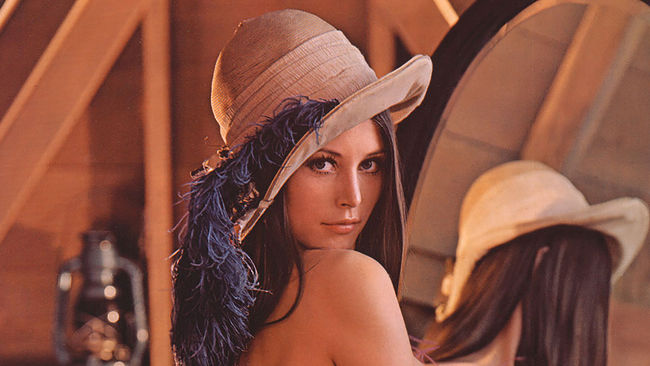

In [8]:
lena